### 寻找最优参数C和gamma

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
mat=sio.loadmat('./data/ex6data3.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [3]:
X,y=mat['X'],mat['y']
Xval,yval=mat['Xval'],mat['yval']

In [4]:
def plot_data():
    plt.scatter(X[:,0],X[:,1],c=y.flatten(),cmap='jet')
    plt.xlabel('x1')
    plt.ylabel('y1')

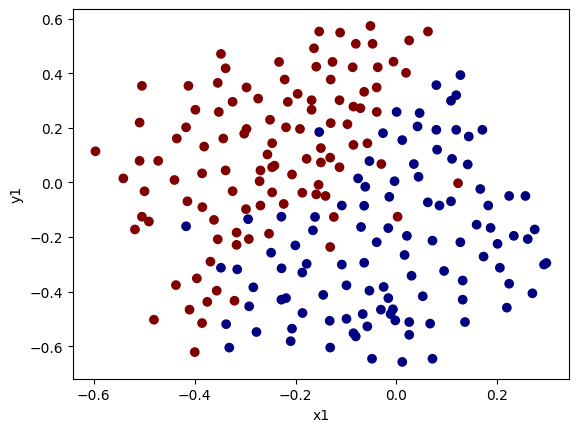

In [5]:
plot_data()

In [8]:
# 候选值
Cvalues=[0.01,0.03,0.1,0.3,1,3,10,30,100]
gammas=[0.01,0.03,0.1,0.3,1,3,10,30,100]

In [10]:
best_score=0
best_params=(0,0)

for c in Cvalues:
    for gamma in gammas:
        svc=SVC(C=c,kernel='rbf',gamma=gamma)
        svc.fit(X,y.flatten())
        score=svc.score(Xval,yval.flatten())
        if score>best_score:
            best_score=score
            best_params=(c,gamma)
print(best_score,best_params)

0.965 (0.3, 100)


In [11]:
svc2=SVC(C=0.3,kernel='rbf',gamma=100)
svc2.fit(X,y.flatten())

,C,0.3
,kernel,'rbf'
,degree,3
,gamma,100
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
def plot_boundary(model):
    x_min,x_max=-0.6,0.4
    y_min,y_max=-0.7,0.6
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))
    z=model.predict(np.c_[xx.flatten(),yy.flatten()])
    zz=z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

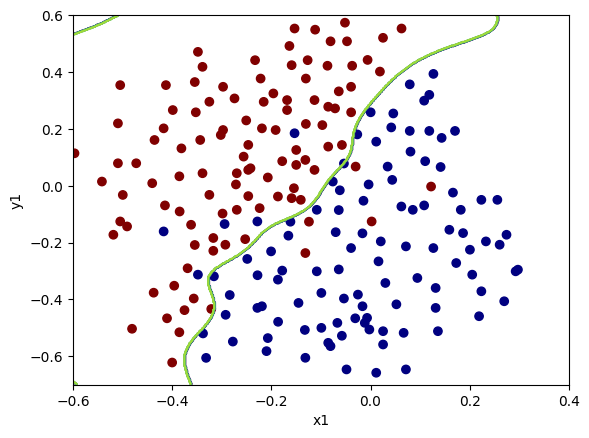

In [14]:
plot_boundary(svc2)
plot_data()